# **PASOS A SEGUIR**
---


# **1. Instalación de las bibliotecas necesarias**


**1.1. Operaciones con las Bibliotecas**

a)   Instalación de una biblioteca


      !pip install <biblioteca>
      !pip install tensorflow
b)   Actualización de una biblioteca


      !pip install --upgrade <biblioteca>
      !pip install --upgrade tensorflow
c)  Eliminación de una bilioteca


      !pip uninstall <biblioteca>
      !pip uninstall tensorflow
d)  Importación de una biblioteca en su totalidad


      import <biblioteca>
      import tensorflow
e)  Importación de una biblioteca en su totalidad bajo un pseudónimo


      import <biblioteca> as <pseudónimo>
      import tensorflow as tf
f)  Importación de una parte específica de una biblioteca


      from <biblioteca> import  <parte>
      from tensorflow import keras

**1.2.  Búsqueda de datasets o de conjuntos de datos de una bibliteca**



TensorFlow y Scikit-learn proporcionan varios conjuntos de datos que se pueden utilizar en las prácticas de Aprendizaje Automático y en el Análisis de datos.

TensorFlow (TFDS) proporciona una amplia colección de conjuntos de datos listos
para usar, abarcando un gran variedad de dominios (textos, imágenes, audio,...).
Se puede acceder a los conjuntos de datos a través de tensorflow_datasets.

Scikit-learn también incluyen varios conjuntos de datos que se pueden utiizar
en las prácticas de Aprendizaje Automátido y en el Análisis de datos.
Se puede acceder a los conjuntos de datos a través del módulo datasets.




a)  Muestra los datasets de tensorflow


      import tensorflow_datasets as tfds
      datasetsTensorflow = tfds.list_builders()
      print( "Conjuntos de datos disponibles en TensorFlow:" )
      print( datasetsTensorflow )



b)  Muestra los datasets de sklearn


      from sklearn import datasets
      datasetsSklearn = dir( datasets )
      nombreDatasetsSklearn = [name[5:] for name in datasetsSklearn if name.startswith( 'load_' )]
      print( "Conjuntos de datos disponibles en Scikit-learn:" )
      print( ", ".join( nombreDatasetsSklearn ) )


# **2. Preparación de los datos**
---

Algunos aspectos importantes a tener en cuenta en este paso son los siguientes:


*   Modificar el orden de los datos: resulta, a veces, muy importante mezclar los datos para evitar que siempre se trabaje con el mismo orden, y así hacer que el orden de los datos NO sea determinante en su resultado.
*   Visualizar los datos: también puede ser importante mostrar los datos para comprobar si hay correlaicones entre distintas características de los mismos.
*   Reducir la dimensionalidad de los datos: simplifica su tratamiento.
*   Balancear los datos: la idea es que sean más representativos y evitar, así, resultados falsos.
*   Separar los datos en dos grupos (entrenamiento y evaluación): normalmente se realiza en una proporción de 80/20, pero puede variar.
*   Preprocesar los datos normalizándolos: para evitar duplicados y hacer corrección de errores.


**2.1. Importación del dataset o conjunto de datos**

a)  Importamos el dataset desde un fichero


    # Cargamos los datos desde la URL en un DataFrame de pandas
    url       = 'iris.data'
    columnas  = [ 'Sépalo_longitud', 'Sépalo_anchura', 'Pétalo_longitud', 'Pétalo_anchura', 'Especie' ]

    # Cargar los datos desde la URL en un DataFrame de pandas con los nombres de columna especificados
    IRIS = pd.read_csv( url, header = None, names = columnas )

    # Quitamos el prefijo 'Iris-' de los valores en la columna 'Especie'
    IRIS[ 'Especie' ] = IRIS[ 'Especie' ].str.replace( 'Iris-', '' )


b)  Importamos el dataset desde una dirección web


    # URL del conjunto de datos de iris en formato CSV, junto con el nombre de las columnas
    url       = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    columnas  = [ 'Sépalo_longitud', 'Sépalo_anchura', 'Pétalo_longitud', 'Pétalo_anchura', 'Especie' ]

    # Cargamos los datos desde la URL en un DataFrame de pandas con los nombres de columna especificados
    IRIS = pd.read_csv( url, header = None, names = columnas )

    # Quitamos el prefijo 'Iris-' de los valores en la columna 'Especie'
    IRIS[ 'Especie' ] = IRIS[ 'Especie' ].str.replace( 'Iris-', '' )


c)  Importamos el dataset desde una librería de Scikit-learn o desde datasets estructurados a partir de plataformas como Kaggle


    IRIS = datasets.load_iris()   # Cargando el dataset

    # Convertimos el dataset a dataframe de Pandas
    IRIS = pd.DataFrame(
        data    = np.c_[  IRIS[ 'data'  ], IRIS[  'target'  ] ],
        columns = IRIS[ 'feature_names'] + [ 'target' ]
    )
    IRIS.head( 5 )    # Muestra unas pocas filas del dataframe
    
    # Debido a que no hay una columna de nombres de especies, agregamos una columna más con nombres
    # de diferentes especies correspondientes a sus valores numéricos.
    # Esto ayuda a acceder a las diferentes clases usando sus nombres en lugar de números.

    especies = []
    for i in range( len( IRIS[ 'target' ] ) ):
        if IRIS[ 'target' ][ i ] == 0:
            especies.append( "setosa" )
        elif IRIS[ 'target' ][ i ] == 1:
            especies.append( 'versicolor' )
        else:
            especies.append( 'virginica' )
    IRIS[ 'Especie' ] = especies

    IRIS.head( 5 )      # Muestra las primeras filas del DataFrame para verificar los cambios
    IRIS.describe()   # Muestra información estadística sencilla del dataset
    IRIS.groupby( 'Especie' ).size()   # Muestra el número de elementos de cada clase: 50

d)  Importamos el dataset desde una librería de Scikit-learn o desde


    from sklearn.datasets import load_iris
    IRIS = load_iris()   # Cargando el dataset
    IRIS.keys()       # Muestra las llaves del dataset, algunas servirán para acceder a datos específicos

    # Convertimos el dataset a dataframe de Pandas
    IRIS = pd.DataFrame(
    data    = np.c_[  IRIS[ 'data'  ], IRIS[  'target'  ] ],
    columns = IRIS[ 'feature_names'] + [ 'target' ]
    )
    IRIS.head( 5 )    # Muestra unas pocas filas del dataframe

    # Debido a que no hay una columna de nombres de especies, agreguemos una columna
    # más con nombres de diferentes especies correspondientes a sus valores numéricos.
    # Esto ayuda a acceder a las diferentes clases usando sus nombres en lugar de números.

    especies = []
    for i in range( len( IRIS[ 'target' ] ) ):
        if IRIS[ 'target' ][ i ] == 0:
            especies.append( "setosa" )
        elif IRIS[ 'target' ][ i ] == 1:
            especies.append( 'versicolor' )
        else:
            especies.append( 'virginica' )
    
    IRIS[ 'Especie' ] = especies

e)  Importamos el dataset de Scikit-learn


    from sklearn.datasets import load_iris

    # Cargamos el dataset Iris
    iris = load_iris()
    
    # Creamos un DataFrame de pandas con los datos
    IRIS = pd.DataFrame( data = iris.data, columns = iris.feature_names )
    
    # Agregar la columna de especies
    IRIS[ 'Especie' ] = iris.target_names[ iris.target ]

f)  Importamos los datos en dos lista: entrenamiento y prueba


    ( xTrain, yTrain ), ( xTest, yTest ) = load_iris()

g)  Generamos los datos de forma aleatoria


    Muestras = 150  # 150 muestras para cada clase (50 para setosa, 50 para versicolor, 50 para virginica)

    # Generar datos sintéticos para cada clase
    np.random.seed( 42 )  # Fijar la semilla para reproducibilidad
    setosa      = np.random.normal( loc = [ 5, 3.5, 1.4, 0.2 ], scale = [ 2.5, 1.5, 0.5, 0.5 ], size =( Muestras//3, 4))
    versicolor  = np.random.normal( loc = [ 6, 2.8, 4.5, 1.5 ], scale = [ 2.5, 1.5, 0.5, 0.3 ], size =( Muestras//3, 4))
    virginica   = np.random.normal( loc = [ 6.5, 3, 5.5, 2   ], scale = [ 2.5, 1.5, 1.0, 0.5 ], size =( Muestras//3, 4))

    # Concatenar los datos de las tres clases
    clases = np.concatenate( [ setosa, versicolor, virginica ] )

    # Crear etiquetas para las clases
    etiquetas = np.array(['setosa'] * (Muestras//3) + ['versicolor'] * (Muestras//3) + ['virginica'] * (Muestras//3))

    # Convertir datos_sinteticos y etiquetas en un DataFrame de pandas
    IRIS = pd.DataFrame( clases, columns = ['Sépalo_longitud', 'Sépalo_anchura', 'Pétalo_longitud', 'Pétalo_anchura'])
    IRIS[ 'Especie' ] = etiquetas

h)  Generamos los datos de forma aleatoria y con funciones def asociadas


    def asignarDatosAleatorios( muestras, valoresMedios, Desviaciones ):
        numCaracteristicas = len( valoresMedios )
        datos = np.random.normal( loc = valoresMedios, scale = Desviaciones, size = ( muestras, numCaracteristicas))
        return datos

    def asignarDatosSetosa( muestras ):
        valoresMedios = [ 5.0, 3.5, 1.4, 0.2 ]
        desviaciones  = [ 2.5, 1.5, 0.5, 0.5 ]
        datosSetosa = asignarDatosAleatorios( muestras, valoresMedios, desviaciones )
        return datosSetosa

    def asignarDatosVersicolor( muestras ):
        valoresMedios = [ 6.0, 2.8, 4.5, 1.5 ]
        desviaciones  = [ 2.5, 1.5, 0.5, 0.3 ]
        datosVersicolor = asignarDatosAleatorios( muestras, valoresMedios, desviaciones )
        return datosVersicolor
    
    def asignarDatosVirginica( muestras ):
        valoresMedios = [ 6.5, 3.0, 5.5, 2.0 ]
        desviaciones  = [ 2.5, 1.5, 1.0, 0.5 ]
        datosSetosa = asignarDatosAleatorios( muestras, valoresMedios, desviaciones )
        return datosSetosa
    
    muestras = 50
    datosSetosa     = asignarDatosSetosa(     muestras )
    datosVersicolor = asignarDatosVersicolor( muestras )
    datosVirginica  = asignarDatosVirginica(  muestras )

    clases = np.concatenate( [ datosSetosa, datosVersicolor, datosVirginica ] )

    # Crear etiquetas para las clases
    etiquetas = np.repeat( [ 'setosa', 'versicolor', 'virginica' ], muestras )

    # Convertir datos_sinteticos y etiquetas en un DataFrame de pandas
    IRIS = pd.DataFrame( clases, columns = [ 'Sépalo_longitud', 'Sépalo_anchura', 'Pétalo_longitud', 'Pétalo_anchura' ] )
    IRIS[ 'Especie' ] = etiquetas

    IRIS.head(5)      # Muestra las primeras filas del DataFrame para verificar los cambios
    IRIS.describe()   # Muestra información estadística sencilla del dataset
    IRIS.groupby( 'Especie' ).size()   # Muestra el número de elementos de cada clase: 50

i)  Descargamos datos de un Dataset, extraemos imágenes y texto, los agrupamos en tablas (imágenes y etiquetas), y los convertimos en un dataset de Tensorflow


    # fashion_mnist, mnist, cifar10, cifar100, symmetric_solids, citrus_leaves, food101
    # stanford_dogs, squad, beans
    NOMBRE_DATASET = input( "Nombre o ruta del dataset: ")

    dataset, metadatos = tfds.load(NOMBRE_DATASET, as_supervised=True, with_info=True)
    if( 'train' in dataset):
        train_data = dataset[ 'train' ]
        DATOS_TOTALES = train_data
        if( 'test' in dataset ):
            test_data = dataset[ 'test' ]
            DATOS_TOTALES = train_data.concatenate( test_data )
        else:
            DATOS_TOTALES = dataset

    # Obtenemos las imágenes y las etiquetas de DATOS_TOTALES
    imagenes = []
    etiquetas = []
    for imagen, etiqueta in DATOS_TOTALES:
        imagenes.append( imagen.numpy() )
        etiquetas.append( etiqueta.numpy() )

    imagenes = np.array(imagenes)
    etiquetas = np.array(etiquetas)

    # Dividimos los datos en conjuntos de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.35, random_state=42)

    # Convertimos los conjuntos de datos en objetos tf.data.Dataset
    datos_entrenamiento = tf.data.Dataset.from_tensor_slices( ( x_train, y_train ) )
    datos_pruebas       = tf.data.Dataset.from_tensor_slices( ( x_test, y_test ) )

    # Agregamos los datos a caché por razones de eficiencia en el entrenamiento
    # Aplicamos el método cache() a los conjuntos de datos
    datos_entrenamiento = datos_entrenamiento.cache()
    datos_pruebas       = datos_pruebas.cache()


**2.2.  División de los datos en entrenamiento y prueba**


    train_test_split( *arrays, test_size = None, train_size = None, random_state = None, shuffle = True, stratify = None )

*    **arrays**:      arreglos que se dividirán. Puede ser una lista o una tupla de arreglos NumPy u otros objetos similares.
*   **test_size**:    tamaño del conjunto de datos de prueba. Puede ser un número entre 0.0 y 1.0 (proporción del conjunto de datos total), o un entero (número exacto de muestras para el conjunto de prueba).
*    **train_size**:   tamaño del conjunto de datos de entrenamiento de manera similar a test_size.

*   **random_state**: controla la aleatorización aplicada antes de dividir los datos. Si se proporciona un entero, fija la semilla aleatoria para garantizar la reproducibilidad de la división.
    
*    **shuffle**:      Indica si los datos deben mezclarse antes de dividirlos. Por defecto es True, lo que significa que los datos se mezclarán aleatoriamente antes de dividirlos.
    
*    **stratify**:     Opcionalmente, permite realizar una división estratificada basada en las etiquetas. Si se proporcionan etiquetas, la división garantizará que las proporciones de las clases sean las mismas en los conjuntos de entrenamiento y prueba.


    from sklearn.model_selection import train_test_split
    (xTrain, xTest), (yTrain, yTest)  = train_test_split( iris, test_size = 0.2, random_state = 42 )

      iris                Conjunto de datos completo, debe contener características y etiquetas.
      test_size = 0.2     Tamaño de los datos de prueba del 20%
      random_state = 42   Semilla aleatoria en 42 para garantizar la reproducibilidad de los resultados


    from sklearn.model_selection import train_test_split
    xTrain, xTest, yTrain, yTest      = train_test_split( iris.data, iris.target, test_size = 0.2, random_state = 42 )

      iris.data           Características o atributos de las muestras en forma de matriz NumPy: longitud del sépalo, anchura del sépalo, longitud del pétalo y anchura del pétalo
      iris.target         Etiquetas de las muestras en forma de matrizNumpy: setosa, versicolor y virginica, codificadas como enteros 0, 1 y 2 respectivamente
      test_size = 0.2     Tamaño de los datos de prueba del 20%
      random_state = 42   Semilla aleatoria en 42 para garantizar la reproducibilidad de los resultados


**2.3.  Obtención de las dimensiones del array**


  **Función shape**: es un atributo de los objetos de tipo array proporcionados por bibliotecas como NumPy y que devuelve las dimensiones del arreglo o matriz.
       En una matriz bidimensional, devuelve filas y columnas.

       datos = np.array( [ [ 1, 2, 3 ], [ 4, 5, 6 ] ] )
       print( datos.shape )          muestra (2, 3)
       print( datos.shape[ 0 ] )     muestra el número de filas de la tabla
       print( datos.shape[ 1 ] )     muestra el número de columnas de la tabla
       dimension = datos.shape


**2.4.  Redimensionamiento de arreglos (o imágenes)**

**Método reshape**: se utiliza para cambiar la forma (shape) de un arreglo o matriz multidimensional.

Es importante tener en cuenta que el producto de las dimensiones debe ser igual al número total de elementos del arreglo o matriz.

    reshape( array, newshape, order = 'C' )
*   **array**:     arreglo o tabla que se va a remodelar
*   **newshape**:  nueva forma deseada de la tabla
*   **order**:     orden de lectura de los elementos: C (fila principal), F (Fortram, columna principal)


      datos = np.array( [ 1, 2, 3, 4, 5, 6 ] )
      datos = datos.reshape( datos.shape[ 0 ], ( 2, 3 ) )
      xTrain = xTrain.reshape( xTrain.shape[ 0 ], 30, 30, 1 )


**2.5.  Normalización de los valores de una variable a valores comprendidos entre 0 y 1**

Convertimos los valores de una matriz de rango 0 a 255 a valores del rango 0 ó 1.

La idea es simplificar las operaciones que se realizarán sobre esos datos.

Si trabajamos con imágenes, esto significa convertir las imágenes de color a blanco y negro.

    datos = datos / 255.0
    xTrain = xTrain / 255.0


**2.6.  Conversión de etiquetas de clase a vector binario con un solo 1 (one-hot encoding)**

Técnica utilizada para representar variables categóricas como vectores binarios, con un tamaño igual al número de categorías, y dicho vector se compondrá de 0s menos la posicion de la categoría representada, que será 1.

    to_categorical( etiquetas, num_classes = None, dtype = 'float32' )
*   **etiquetas**:   arreglo o matriz de etiquetas de clase
*   **num_classes**: número total de clases de datos, si no hay se infiere automáticamente
*   **dtype**:       tipo de dato de la matriz de salida


    from tensorflow.keras.utils import to_categorical
    datos = to_categorical( datos )
    xTrain = to_categorical( xTrain )


**2.7.  Conversión de los datos a otra unidad**

**Función astype**: sirve para cambiar el tipo de datos de todo un arreglo Numpy a otro tipo de datos.

    datos = np.array( [ 1, 2, 3, 4 ] )
    datos = datos.astype( 'float' )
    xTrain = xTrain.astype( 'float32' )


**2.8. Convertir listas de datos a Datasets**

Crea un objeto Dataset a partir de distintos tensores que se pasan por parámetros, agrupados entre paréntesis y separados por comas.

    datosEntrenamiento = tf.data.Dataset.from_tensor_slices( ( x_train, y_train ) )
    datosEntrenamiento = from_tensor_slices( ( x_train, y_train ) )


**2.9. Agregar datos a caché por razones de eficiencia en el entrenamiento**

Se suele incluir cache() después de la operación de reordenamiento, y así, los elementos del conjunto de datos se almacenarán en caché después de haber sido mezclados y repetidos. Esto puede ser útil si el preprocesamiento o la generación de los datos es costoso en términos computacionales, ya que evitará que este proceso se repita cada vez que se itere sobre el conjunto de datos durante el entrenamiento.

    datosEntrenamiento = datosEntrenamiento.cache()

**2.10. Reordenar los datos**

**Función shuffle**: reordena aleatoriamente los elementos de un conjunto de datos. Esta función es comúnmente utilizada en el preprocesamiento de datos para introducir aleatoriedad en el orden de los ejemplos de entrenamiento, lo cual puede ser beneficioso para mejorar la eficacia del entrenamiento de modelos de aprendizaje automático, especialmente en casos donde existe una dependencia en el orden de los datos.

    datosEntrenamiento = datosEntrenamiento.shuffle( buffer_size )

El parámetro buffer_size determina el tamaño del búfer de mezcla.

    shuffle( buffer_size = len( x_train ) )



# **3. Elección del modelo**
---

La elección del modelo puede ayudar en la confección de un mejor o peor sistema, pero se puede elegir en función del objetivo buscado:


*   Regresión logística: aplicaciones de predicción.
*   Redes totalmente conectadas: aplicaciones de clasificación.
*   Redes neuronales convolucionales: aplicaciones de asociadas al procesamiento de imágenes.
*   Redes neuronales recurrentes: aplicaciones de reconocimiento de voz.
*   Bosque aleatorio: aplicaciones de reconocimiento de fraudes.
*   Aprendizaje reforzado: aplicaciones para enseñar a jugar.
*   Modelos generativos: aplicaciones para crear imágenes.
*   Modelo K-means: aplicaciones para segmentar datos sin etiquetar.
*   Modelo vecino más próximo: aplicaciones para recomendar por similitud o cercanía.
*   Clasificadores Bayesianos: aplicaciones de clasificación de contenidos, emails.



Paso crucial en el proceso de construcción de una aplicación de Machine Learning. Los parámetros que se configuran son los siguientes:
*   Número de capas y unidades
*   Función de activación
*   Optimizador y función de pérdida
*   Reducir o eliminar problemas de overfitting (o underfitting).
*   Tasa de aprendizaje.
*   Máximo error permitido.
---


* CAPA DENSA:   Dense( neuronas, kernel_size=(n,n), activation='tipo', input_shape=(m,n) )
  *   Dense( neuronas, activation='relu', input_shape=(m,n) )  -> capa de entrada al modelo
  *   Dense( neuronas, activation='relu')                     -> capa intermedia del modelo
  *   Dense( neuronas, activation='sigmoid')                  -> capa de selección del modelo

* CAPA CONVOLUTIONAL: Conv2D( neuronas, kernel_size=(n,n), activation='tipo'', input_shape=(m,n) )
  *   Conv2D( neuronas, kernel_size=(n,n), activation='relu', input_shape=(m,n))  -> capa de entrada al modelo
  *   Conv2D( neuronas, kernel_size=(n,n), activation='relu')                     -> capa intermedia del modelo

* CAPA DE AGRUPACIÓN (POOLING): MaxPooling2D( pool_size=(n,n)  )
  *   MaxPooling2D( (n,n) )

* CAPA RECURRENTE: (LSTM, GRU)
  *   LSTM( unidades )

* CAPA DE INCRUSTACIÓN: mapea valores discretos (input_dim) en vectores de números reales (output_dim)
  *   Embedding(input_dim=n, output_dim=m)

* CAPA DE REGULACIÓN (DROPOUT): anula un % aleatorio de unidades de entrada
  *   Dropout( valor )

* CAPA DE NORMALIZACIÓN POR LOTES: normaliza las actividades de una capa anterior, acelerando el entrenamiento y mejorando la estabilidad del modelo
  *   BatchNormalization()

* CAPA DE ACTIVACIÓN: aplica una función de activación a las salidas de una capa anterior: relu, sigmoid, tanh, ...
  *   activation = 'función de activación'

* CAPA DE CONCATENACIÓN: une varias salidas de capas precedentes a lo largo de eje
  *   Concatenate()



*  OPTIMIZER: algoritmo de optimización durante el entrenamiento
   *  Con ritmo de aprendizaje adaptativo:  'adam', 'adamax', 'nadam', 'adamax'
   *  Con descenso de gradiente:  'sgd', 'adagrad', 'adadelta'
   *  Basado en algoritmos avanzados: 'rmsprop', 'amsgrad', 'adagrad_da'

*  LOSS: función de pérdida para calcular diferencia entre valores de predicción y los reales
  * Clasificación binaria: 'binary_crossentropy', 'log_loss'
  * Clasificación multiclase: 'categorical_crossentropy', 'sparse_categorical_crossentropy'
  * Clasificación regresión: 'mean_squared_error', 'mean_absolute_error', 'mean_squared_logarithmic_error'

*  METRICS: métrica para evaluar el rendimiento del modelo
  * Clasificación binaria o multiclase: 'accuracy', 'precision', 'recall', 'fi_score'
  * Clasificación de regresión: 'mean_absolute_error', 'r_squared'


# **6. Entrenamiento del modelo**
---

En este paso se utiliza un set de datos de entrenamiento para ejecutar el modelo y observar una mejora incremental en la predicción.

Resulta muy importante inicializar los pesos del modelo de forma aleatoria, porque afectan a las relaciones entre las entradas y las salidas, pero con el paso del tiempo, se irán ajustanto automáticamente según el algoritmo elegido y el número de entranamientos.

Se debe observar los resultados obtenidos y corregirlos, y volver a iterar hasta alcanzar unos resultados deseables.



# **7. Evaluación del modelo**
---
Se debe comprobar el modelo creado con un grupo de datos de evaluación, con entradas desconocidas por el sistema para verificar la precisión de dicho modelo.

Si la exactitud no resulta superior al 50%, el modelo no será muy útil para la toma de decisiones.

Si el modelo alcanza un 90% o más, tendremos una buena confianza en los resultados proporcionados por el modelo.


# **8. Predicción o inferencia del modelo**
---

La inferencia es el proceso de generación de predicciones del modelo para los nuevos datos que no se usan durante el entrenamiento.

# **1. Instalación de las bibliotecas necesarias**
---

In [1]:
#-----------------------------------------------------------------------------------------------------
# 1.  Instalación de las bibliotecas necesarias
#-----------------------------------------------------------------------------------------------------
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from sklearn.model_selection import train_test_split

# **2. Preparación de los datos**
---

In [2]:
#------------------------------------------------------------------------
# 2. Preparación de los datos
#------------------------------------------------------------------------
#    Descargamos un conjunto de datos con parte 'train' y 'test'
#------------------------------------------------------------------------
# datos, metadatos = tfds.load( '', as_supervised = True, with_info = True )
#------------------------------------------------------------------------
# fashion_mnist, mnist, cifar10, cifar100, symmetric_solids, citrus_leaves, food101
# stanford_dogs, squad, beans
#------------------------------------------------------------------------
TAMAÑO_PRUEBA = 0.35

while True:
    try:
        NOMBRE_DATASET = 'mnist'
        dataset, metadatos = tfds.load( NOMBRE_DATASET, as_supervised = True, with_info = True )

        if 'train' in dataset:
            train_data = dataset[ 'train' ]
            DATOS_TOTALES = train_data
            if 'test' in dataset:
                test_data = dataset[ 'test' ]
                DATOS_TOTALES = train_data.concatenate( test_data )
        else:
            DATOS_TOTALES = dataset

        break  # Sale del bucle si la carga del dataset es exitosa
    except Exception as e:
        print(f"No se pudo cargar el dataset. Error: {e}")

# Obtener las imágenes y las etiquetas de DATOS_TOTALES
imagenes = []
etiquetas = []
for imagen, etiqueta in DATOS_TOTALES:
    imagenes.append( imagen.numpy() )
    etiquetas.append( etiqueta.numpy() )

imagenes = np.array( imagenes )
etiquetas = np.array( etiquetas )

# Redimensionar todas las imágenes a la dimensión de la primera imagen

# Dividimos los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split( imagenes, etiquetas, test_size = TAMAÑO_PRUEBA, random_state = 42 )

# Convertimos los conjuntos de datos en objetos tf.data.Dataset
datosEntrenamiento = tf.data.Dataset.from_tensor_slices( ( x_train, y_train ) )
datosPruebas       = tf.data.Dataset.from_tensor_slices( ( x_test, y_test ) )

# Aplicamos el método cache() a los conjuntos de datos por cuestiones de eficiencia
datosEntrenamiento = datosEntrenamiento.cache()
datosPruebas       = datosPruebas.cache()

# **3. Elección del modelo**
---

In [3]:
#------------------------------------------------------------------------
# 3. Elección del modelo
#------------------------------------------------------------------------
modelo = tf.keras.Sequential()

# **4. Configuración de los parámetros del modelo**
---

In [4]:
#------------------------------------------------------------------------
# 4. Configuración de los parámetros del modelo:
#------------------------------------------------------------------------
nombres_clases  = metadatos.features['label'].names
CLASES_ELEMENTOS = len(nombres_clases)
INPUT_SHAPE = imagenes[0].shape
TAMAÑO_KERNEL = (3, 3)  # Tamaño del kernel
TAMAÑO_POOLING = (2, 2)  # Tamaño del pooling
TAMAÑO_DROPOUT = 0.3
ACTIVACION = 'relu'

modelo.add(Conv2D(256, kernel_size=TAMAÑO_KERNEL, activation=ACTIVACION, input_shape=INPUT_SHAPE))
modelo.add(MaxPooling2D(TAMAÑO_POOLING))
modelo.add(Dropout(TAMAÑO_DROPOUT))
modelo.add(BatchNormalization())

modelo.add(Conv2D(128, TAMAÑO_KERNEL, activation=ACTIVACION))
modelo.add(MaxPooling2D(TAMAÑO_POOLING))
modelo.add(Dropout(TAMAÑO_DROPOUT))
modelo.add(BatchNormalization())

modelo.add(Conv2D(64, TAMAÑO_KERNEL, activation=ACTIVACION))
modelo.add(MaxPooling2D(TAMAÑO_POOLING))
modelo.add(Dropout(TAMAÑO_DROPOUT))
modelo.add(BatchNormalization())

modelo.add(Flatten())
modelo.add(Dense(128, activation=ACTIVACION))
modelo.add(Dropout(0.5))
modelo.add(Dense(CLASES_ELEMENTOS, activation='softmax'))

c:\Users\Mario\FP\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **5. Compilación del modelo:** compile( optimizer, loss, metrics )
---

In [5]:
#------------------------------------------------------------------------
# 5. Compilación del modelo
#------------------------------------------------------------------------
modelo.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = [ 'accuracy' ]
)

# **6. Entrenamiento del modelo**
---

In [6]:
#------------------------------------------------------------------------
# 6. Entrenamiento del modelo
#------------------------------------------------------------------------
# DATOS NECESARIOS PARA EL ENTRENAMIENTO
#------------------------------------------------------------------------
NUM_ENTRENAMIENTO = len(datosEntrenamiento)
NUM_PRUEBAS = len(datosPruebas)
LOTE = 64  # Modificación de LOTE
TAMANO_LOTE = math.ceil(NUM_ENTRENAMIENTO / LOTE)
ACIERTOS = 0.90  # Modificación de ACIERTOS
NOM_FICHERO = NOMBRE_DATASET + '.keras'

#------------------------------------------------------------------------
# SHUFFLE HACE QUE LOS DATOS ESTÉN MEZCLADOS DE FORMA ALEATORIA PARA QUE
# LA RED NO SE APRENDA EL ORDEN
#------------------------------------------------------------------------
datosEntrenamiento = datosEntrenamiento.shuffle(NUM_ENTRENAMIENTO).batch(LOTE)
datosPruebas = datosPruebas.batch(LOTE)

#------------------------------------------------------------------------
# ENTRENAMOS EL MODELO
#------------------------------------------------------------------------
historial = modelo.fit(datosEntrenamiento, epochs=1, steps_per_epoch=TAMANO_LOTE)
modelo.save(NOM_FICHERO)
while historial.history['accuracy'][0] < ACIERTOS:
    datosEntrenamiento.shuffle(NUM_ENTRENAMIENTO).batch(LOTE)
    historial = modelo.fit(datosEntrenamiento, epochs=1, steps_per_epoch=TAMANO_LOTE)
    modelo.save(NOM_FICHERO)

711/711 ━━━━━━━━━━━━━━━━━━━━ 73s 100ms/step - accuracy: 0.7116 - loss: 0.8887
711/711 ━━━━━━━━━━━━━━━━━━━━ 75s 106ms/step - accuracy: 0.9491 - loss: 0.1764


# **7. Evaluación del modelo**
---

In [7]:
#------------------------------------------------------------------------
# 7. Evaluación del modelo
#------------------------------------------------------------------------
evaluacion = modelo.evaluate( datosPruebas, verbose = 0 )
print( "Resultados de la evaluación:" )
print( "----------------------------" )
print( f"Pérdida: {evaluacion[ 0 ]   * 100:.2f}%" )
print( f"Precisión: {evaluacion[ 1 ] * 100:.2f}%" )

Resultados de la evaluación:
----------------------------
Pérdida: 8.29%
Precisión: 97.53%


# **8. Predicción o inferencia del modelo**
---

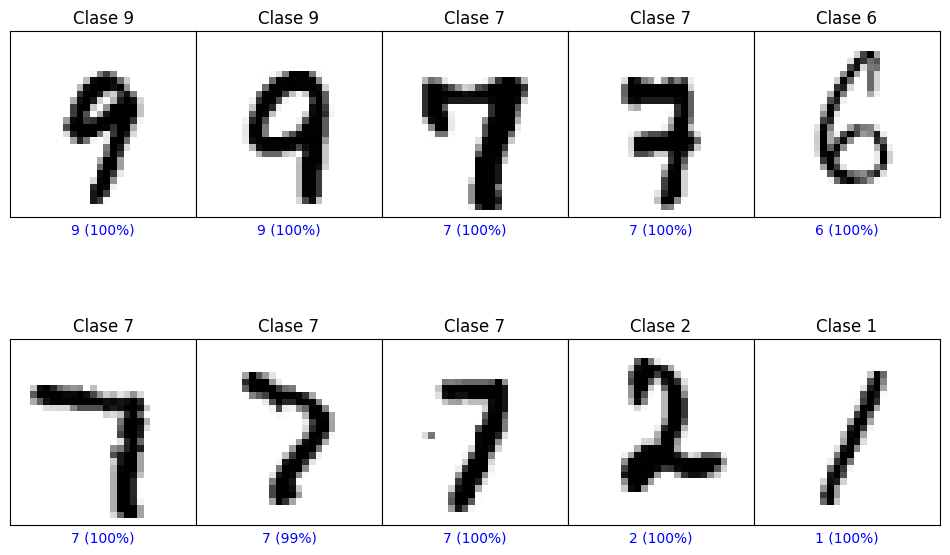

In [9]:
#------------------------------------------------------------------------
# 8. Predicción o inferencia
#------------------------------------------------------------------------
def trazar_imagen(i, array_predicciones, etiquetas_reales, imagenes):
  array_predicciones, etiqueta_real, imagen = array_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen[..., 0], cmap=plt.cm.binary)
  etiqueta_prediccion = np.argmax(array_predicciones)
  color = 'blue'
  if etiqueta_prediccion != etiqueta_real:
    color = 'red'
  plt.title('Clase {}'.format(nombres_clases[etiqueta_real]))
  plt.xlabel("{} ({:2.0f}%)".format(nombres_clases[etiqueta_prediccion], 100 * np.max(array_predicciones)), color=color)

filas = 2
columnas = 5
numImagenes = filas * columnas

for imagenesPrueba, etiquetasPrueba in datosPruebas.shuffle(len(datosPruebas)).take(numImagenes):
  imagenesPrueba = imagenesPrueba.numpy()
  etiquetasPrueba = etiquetasPrueba.numpy()

predicciones = modelo.predict(imagenesPrueba, verbose=0)

# Modificación de los valores de figsize
plt.figure(figsize=(12, 8))

plt.subplots_adjust(hspace=0, wspace=0)

for i, _ in enumerate(range(numImagenes)):
  plt.subplot(filas, columnas, i + 1)
  trazar_imagen(i, predicciones, etiquetasPrueba, imagenesPrueba)

plt.show()